In [1]:
pip install tensorflow==2.2.0

Note: you may need to restart the kernel to use updated packages.


In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = data.load_data()
#print(train_images)
print(train_labels) #The label is the type of item in image.
print(len(train_labels))
print(test_labels)
print(len(test_labels))

[9 0 0 ... 3 0 5]
60000
[9 2 1 ... 8 1 5]
10000


In [14]:
print(train_images) #>> the nested array, an array containing many arrays that represent pixels of images
print(train_images[7]) #Select the 6th arrays containing the 6th array for image pixel value.

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
[[  0   0   0   0   0   1   1   0   0   0   0  63  28   0   0   0  33  85
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   2   0   0  28 126 241 255 255 255 255 255 255 252
  248 111   0   0   0   2   0   0  

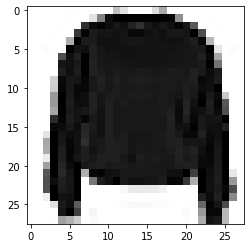

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.imshow(train_images[7], cmap = plt.cm.binary)

plt.show()

In [4]:
#Shrink data into smaller decimal values for convenient working for models.
train_images = train_images / 140.0
test_images = test_images / 140.0

print(len(train_images))

60000


In [9]:
#See shrunk datasets
print(train_images[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00714286 0.    

In [5]:
#Try basic modelling >> One (hidden) layer NN 

#Define the format of the model.
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(128, activation = 'relu'), #the number assigned is the #hidden units.
    keras.layers.Dense(10, activation = 'softmax') #Th number asigned is the #classes of our image.
    ])

#Define the solver and metrics for ongoing model validation.
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

#Fit/Train the model with training information.
model.fit(train_images, train_labels, epochs = 5)

#Evaluate the performance on prediction over testing set.
test_loss, test_acc = model.evaluate(test_images, test_labels)

print("test accuracy ", test_acc)


Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4922 - accuracy: 0.8251
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3679 - accuracy: 0.8666
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3348 - accuracy: 0.8775
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3132 - accuracy: 0.8858
Epoch 5/5
313/313 [==============================] - 0s 910us/step - loss: 0.3644 - accuracy: 0.8698
test accuracy  0.8697999715805054


In [6]:
#Prediction
pred = model.predict(test_images)
print(pred)

[[2.0275443e-06 9.1366220e-10 1.3027946e-07 ... 7.4217105e-03
  1.4668984e-06 9.9220687e-01]
 [9.7463444e-06 1.5952621e-13 9.8194581e-01 ... 9.1098777e-20
  4.9146746e-12 2.5219813e-15]
 [1.0631469e-08 1.0000000e+00 6.5324093e-11 ... 1.6409066e-26
  5.8204937e-11 3.7254666e-17]
 ...
 [1.1064323e-02 1.2011764e-06 2.4447069e-03 ... 3.0466474e-08
  9.7386009e-01 2.6593800e-09]
 [2.1717334e-08 9.9999034e-01 8.9640195e-10 ... 2.0100335e-17
  7.9570901e-09 1.6069256e-12]
 [4.7236774e-04 6.3769124e-07 5.5483053e-04 ... 2.2792274e-02
  3.8451366e-03 1.7669375e-04]]


In [7]:
print(pred[0])
print(pred[0][1])

[2.0275443e-06 9.1366220e-10 1.3027946e-07 1.2895102e-09 1.0794528e-08
 3.6554056e-04 2.2603385e-06 7.4217105e-03 1.4668984e-06 9.9220687e-01]
9.136622e-10


In [10]:
print(class_names[np.argmax(pred[0])])
print(test_labels[0])

Ankle boot
9


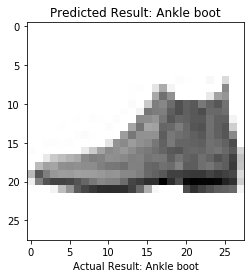

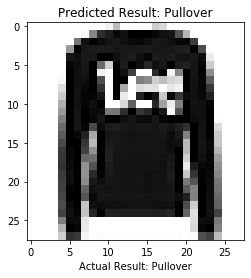

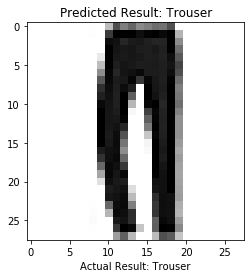

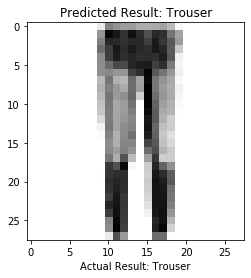

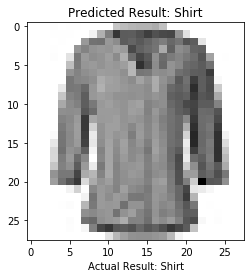

In [26]:
#See the image and its corresponding predicted/actual results 
#Number in range represents how many images you wanna see.

for i in range(5):
    plt.grid(False)
    plt.imshow(test_images[i], cmap = plt.cm.binary)
    #plt.xlabel(f"Actual Result:{test_labels[i]}")
    plt.xlabel("Actual Result: " + str(class_names[test_labels[i]]))
    #If we consider plt.xlabel("Actual Result: ", test_labels[i]), the result will become pop issue 'numpy.uint8' object has no attribute 'pop'
    #It can only support "string" value, in str(). This is same as plt.title () below.
    plt.title(f"Predicted Result: {class_names[np.argmax(pred[i])]}")
    plt.show()